In [1]:
# data manipulation libraries
import numpy as np
import pandas as pd
from ast import literal_eval
from sklearn.model_selection import train_test_split

# pyspark
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark.sql import types, functions as F

# random seed for reproducibility
RANDOM_SEED = 15

import shap
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
from sklearn.model_selection import RepeatedKFold
plt.style.use('seaborn-white')

app_name = 'poi-reseller'
conf = (SparkConf()
        .setMaster("yarn-client")
        .setAppName(app_name)
        .set("spark.executor.memory", "8g")
        .set("spark.executor.instances", "1")
        .set("spark.executor.cores", "4")
        .set("spark.driver.memory", "8g")
        .set("spark.yarn.queue", "root.hue_dmp")
        .set("spark.default.parallelism", "8")
        .set("spark.sql.shuffle.partitions", "1000")
        .set("spark.shuffle.service.enabled", "true")
        .set("spark.dynamicAllocation.enabled", "true")
        .set("spark.yarn.driver.memoryOverhead", "4096")
        .set("spark.yarn.executor.memoryOverhead", "4096")
        .set("spark.kryoserializer.buffer.max", "1g")
        .set("spark.dynamicAllocation.minExecutors", "1")
        .set("spark.dynamicAllocation.maxExecutors", "20")
        .set("spark.driver.maxResultSize", "4g")
        .set("spark.sql.crossJoin.enabled", "true")
        .set("spark.hadoop.fs.permissions.umask-mode", "002")
        .set("spark.sql.autoBroadcastJoinThreshold", "-1")
        .set("spark.dynamicAllocation.initialExecutors", "1"))
sc = SparkContext.getOrCreate(conf=conf)
spark = SparkSession(sc)
spark


Bad key backend.qt4 in file /etc/matplotlib/matplotlibrc, line 43 ('backend.qt4 : PyQt4        # PyQt4 | PySide')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
#df1 = spark.read.table('dbi.sample_site_for_outlet_v2')
#df1 = df1.toPandas()

In [4]:
#Spark Reead : for Aggregation :

pd.options.display.max_columns = None
pd.options.display.max_rows = None

df_input = spark.sql("""select 
                        site_id as site_id,
                        site_name as site_name,
                        long as long,
                        lat as lat,
                        class as class,
                        kecamatan as kecamatan,
                        kabupaten as kabupaten,
                        region as region,
                        subs_4g as subs_4g,
                        fea_min_distance_outlet_to_leisure_and_outdoor as min_distance_from_site_to_POI_catefgory_leisure_and_outdoor,
                        fea_min_distance_outlet_to_areas_and_buildings as min_distance_from_site_to_POI_catefgory_areas_and_buildings,
                        fea_min_distance_outlet_to_shopping as min_distance_from_site_to_POI_catefgory_shopping,
                        fea_min_distance_outlet_to_going_out_entertainment as min_distance_from_site_to_POI_catefgory_going_out_entertainment,
                        fea_min_distance_outlet_to_sights_and_museums as min_distance_from_site_to_POI_catefgory_sights_and_museums,
                        fea_min_distance_outlet_to_facilities as min_distance_from_site_to_POI_catefgory_facilities,
                        fea_min_distance_outlet_to_accommodation as min_distance_from_site_to_POI_catefgory_accommodation,
                        fea_min_distance_outlet_to_natural_and_geographical as min_distance_from_site_to_POI_catefgory_natural_and_geographical,
                        fea_min_distance_outlet_to_business_and_services as min_distance_from_site_to_POI_catefgory_business_and_services,
                        fea_min_distance_outlet_to_transport as min_distance_from_site_to_POI_catefgory_transport,
                        fea_min_distance_outlet_to_eat_and_drink as min_distance_from_site_to_POI_catefgory_eat_and_drink,
                        fea_outlet_under_100m_to_leisure_and_outdoor as number_of_POI_within_100m_category_leisure_and_outdoor,
                        fea_outlet_under_100m_to_areas_and_buildings as number_of_POI_within_100m_category_areas_and_buildings,
                        fea_outlet_under_100m_to_shopping as number_of_POI_within_100m_category_shopping,
                        fea_outlet_under_100m_to_going_out_entertainment as number_of_POI_within_100m_category_going_out_entertainment,
                        fea_outlet_under_100m_to_sights_and_museums as number_of_POI_within_100m_category_sights_and_museums,
                        fea_outlet_under_100m_to_facilities as number_of_POI_within_100m_category_facilities,
                        fea_outlet_under_100m_to_accommodation as number_of_POI_within_100m_category_accommodation,
                        fea_outlet_under_100m_to_business_and_services as number_of_POI_within_100m_category_business_and_services,
                        fea_outlet_under_100m_to_transport as number_of_POI_within_100m_category_transport, 
                        availability as availability,
                        bandwidth as available_network_resources
                    from
                        dbi.sample_site_for_outlet_v2 b 
""").toPandas()
df_input.head()


,site_id,site_name,long,lat,class,kecamatan,kabupaten,region,subs_4g,min_distance_from_site_to_POI_catefgory_leisure_and_outdoor,min_distance_from_site_to_POI_catefgory_areas_and_buildings,min_distance_from_site_to_POI_catefgory_shopping,min_distance_from_site_to_POI_catefgory_going_out_entertainment,min_distance_from_site_to_POI_catefgory_sights_and_museums,min_distance_from_site_to_POI_catefgory_facilities,min_distance_from_site_to_POI_catefgory_accommodation,min_distance_from_site_to_POI_catefgory_natural_and_geographical,min_distance_from_site_to_POI_catefgory_business_and_services,min_distance_from_site_to_POI_catefgory_transport,min_distance_from_site_to_POI_catefgory_eat_and_drink,number_of_POI_within_100m_category_leisure_and_outdoor,number_of_POI_within_100m_category_areas_and_buildings,number_of_POI_within_100m_category_shopping,number_of_POI_within_100m_category_going_out_entertainment,number_of_POI_within_100m_category_sights_and_museums,number_of_POI_within_100m_category_facilities,number_of_POI_within_100m_category_accommodation,number_of_POI_within_100m_category_business_and_services,number_of_POI_within_100m_category_transport,availability,available_network_resources
0,DPR033,DPR033M41_HotelintanSari,115.209720,-8.658200,Silver,DENPASAR BARAT,KOTA DENPASAR,BALI NUSRA,176.0,42.67,469.39,23.12,59.18,20.29,17.70,22.54,3024.48,20.68,74.15,25.11,1.0,0.0,32.0,1.0,2.0,10.0,1.0,11.0,1.0,100.0,150.0
1,BIM187,BIM187M41_DoroLuwu,118.516720,-8.478212,Silver,MADA PANGGA,BIMA,BALI NUSRA,264.0,709.89,1148.85,66.48,8445.20,55.11,527.42,3192.16,7228.01,585.75,3286.25,3644.60,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,100.0,90.0
2,SMD390,SMD390M41_DSNKIRISIKPAJAGANIGIHON-GHN,108.169472,-6.967944,Bronze,JATINUNGGAL,SUMEDANG,WEST JAVA,80.0,3176.05,552.13,40.04,2238.89,117.56,37.10,2449.66,11302.95,45.67,1629.87,58.46,0.0,0.0,14.0,0.0,0.0,4.0,0.0,5.0,0.0,100.0,30.0
3,SUB518,SUB518M41_DUSUNTENGAH-TBG,107.825800,-6.277200,Gold,PAMANUKAN,SUBANG,WEST JAVA,614.0,622.39,613.37,310.83,338.56,338.70,364.56,1004.12,0.00,295.08,1002.56,322.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,90.0
4,BIR300,BIR300MM2-MATANG-REULEUT,96.598663,5.203829,Bronze,PEUDADA,BIREUEN,SUMBAGUT,107.0,4511.92,380.06,442.76,1430.14,52.53,112.37,2216.73,0.00,399.68,1745.68,210.40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0,30.0


In [8]:
#Spark Reead : for Aggregation :

pd.options.display.max_columns = None
pd.options.display.max_rows = None

#df_100m = spark.sql("""select 
                        b.kecamatan,
                        sum(b.subs_4g) as subs_4g,
                        avg(b.fea_min_distance_outlet_to_leisure_and_outdoor) min_distance_from_site_to_POI_catefgory_leisure_and_outdoor,
                        avg(b.fea_min_distance_outlet_to_areas_and_buildings) min_distance_from_site_to_POI_catefgory_areas_and_buildings,
                        avg(b.fea_min_distance_outlet_to_shopping) min_distance_from_site_to_POI_catefgory_shopping,
                        avg(b.fea_min_distance_outlet_to_going_out_entertainment) min_distance_from_site_to_POI_catefgory_going_out_entertainment,
                        avg(b.fea_min_distance_outlet_to_sights_and_museums) min_distance_from_site_to_POI_catefgory_sights_and_museums,
                        avg(b.fea_min_distance_outlet_to_facilities) min_distance_from_site_to_POI_catefgory_facilities,
                        avg(b.fea_min_distance_outlet_to_accommodation) min_distance_from_site_to_POI_catefgory_accommodation,
                        avg(b.fea_min_distance_outlet_to_natural_and_geographical) min_distance_from_site_to_POI_catefgory_natural_and_geographical,
                        avg(b.fea_min_distance_outlet_to_business_and_services) min_distance_from_site_to_POI_catefgory_business_and_services,
                        avg(b.fea_min_distance_outlet_to_transport) min_distance_from_site_to_POI_catefgory_transport,
                        avg(b.fea_min_distance_outlet_to_eat_and_drink) min_distance_from_site_to_POI_catefgory_eat_and_drink,
                        avg(b.availability) availability,
                        avg(b.cei_rating) cei_rating,
                        avg(b.nei_rating) nei_rating,
                        avg(b.bandwidth) available_network_resources
                    from
                        dbi.sample_site_for_outlet_v2 b 
                    where 
                        b.subs_4g > 100
                     group by kecamatan
""").toPandas()
df_100m.head()

,kecamatan,subs_4g,min_distance_from_site_to_POI_catefgory_leisure_and_outdoor,min_distance_from_site_to_POI_catefgory_areas_and_buildings,min_distance_from_site_to_POI_catefgory_shopping,min_distance_from_site_to_POI_catefgory_going_out_entertainment,min_distance_from_site_to_POI_catefgory_sights_and_museums,min_distance_from_site_to_POI_catefgory_facilities,min_distance_from_site_to_POI_catefgory_accommodation,min_distance_from_site_to_POI_catefgory_natural_and_geographical,min_distance_from_site_to_POI_catefgory_business_and_services,min_distance_from_site_to_POI_catefgory_transport,min_distance_from_site_to_POI_catefgory_eat_and_drink,availability,cei_rating,nei_rating,available_network_resources
0,LONGKIB,134.0,7159.650000,1454.060000,6630.810000,12297.270000,1250.140000,258.890000,15365.900000,0.000000,5528.380000,0.000000,1288.390000,100.000000,3.901838,3.327989,90.000000
1,BAITURRAHMAN,13028.0,313.158696,239.236087,53.360435,224.850000,103.160870,48.330000,188.214783,0.000000,41.703478,321.136522,75.632174,100.000000,4.674971,3.584661,106.956522
2,TANJUNGANOM,6384.0,1750.240909,892.628182,179.470909,2150.210000,349.133636,167.148182,1391.809091,3770.685455,252.965455,2348.627273,200.818182,99.987374,4.064341,3.067871,113.636364
3,PADANG UTARA,24350.0,414.605937,298.962500,50.041250,235.780000,111.087813,57.321562,164.410313,2521.945625,58.221875,177.319687,64.180000,100.000000,NaN,NaN,105.156250
4,AMBARAWA,6697.0,783.605714,471.123571,81.397143,726.416429,141.305714,120.708571,699.740000,3164.219286,115.232143,1330.619286,145.575714,100.000000,4.041881,3.295456,97.142857


In [4]:
#iudf = spark.sql("""select 
                        b.kecamatan,
                        b.class,
                        sum(b.subs_4g) as subs_4g,
                        sum(b.fea_outlet_under_100m_to_leisure_and_outdoor) number_of_POI_within_100m_category_leisure_and_outdoor,
                        sum(b.fea_outlet_under_100m_to_areas_and_buildings) number_of_POI_within_100m_category_areas_and_buildings,
                        sum(b.fea_outlet_under_100m_to_shopping) number_of_POI_within_100m_category_shopping,
                        sum(b.fea_outlet_under_100m_to_going_out_entertainment) number_of_POI_within_100m_category_going_out_entertainment,
                        sum(b.fea_outlet_under_100m_to_sights_and_museums) number_of_POI_within_100m_category_sights_and_museums,
                        sum(b.fea_outlet_under_100m_to_facilities) number_of_POI_within_100m_category_facilities,
                        sum(b.fea_outlet_under_100m_to_accommodation) number_of_POI_within_100m_category_accommodation,
                        sum(b.fea_outlet_under_100m_to_natural_and_geographical) number_of_POI_within_100m_category_natural_and_geographical,
                        sum(b.fea_outlet_under_100m_to_business_and_services) number_of_POI_within_100m_category_business_and_services,
                        sum(b.fea_outlet_under_100m_to_transport) number_of_POI_within_100m_category_transport,            
                        sum(b.fea_outlet_under_100m_to_eat_and_drink) number_of_POI_within_100m_category_eat_and_drink,
                        avg(b.availability) availability,
                        avg(b.cei_rating) cei_rating,
                        avg(b.nei_rating) nei_rating,
                        avg(b.bandwidth) available_network_resources
                    from
                        mkt_hq_v.sample_site_for_outlet_v2 b 
                    where 
                        b.subs_4g > 0
                     group by kecamatan
""").toPandas()
iudf.head()

,kecamatan,subs_4g,number_of_POI_within_100m_category_leisure_and_outdoor,number_of_POI_within_100m_category_areas_and_buildings,number_of_POI_within_100m_category_shopping,number_of_POI_within_100m_category_going_out_entertainment,number_of_POI_within_100m_category_sights_and_museums,number_of_POI_within_100m_category_facilities,number_of_POI_within_100m_category_accommodation,number_of_POI_within_100m_category_natural_and_geographical,number_of_POI_within_100m_category_business_and_services,number_of_POI_within_100m_category_transport,number_of_POI_within_100m_category_eat_and_drink,availability,cei_rating,nei_rating,available_network_resources
0,LONGKIB,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,3.901838,3.327989,90.000000
1,BAITURRAHMAN,13298.0,7.0,2.0,574.0,7.0,46.0,133.0,13.0,0.0,192.0,6.0,101.0,100.000000,4.729025,3.590901,98.888889
2,TANJUNGANOM,6384.0,0.0,0.0,43.0,0.0,1.0,12.0,0.0,0.0,13.0,0.0,12.0,99.987374,4.064341,3.067871,113.636364
3,PADANG UTARA,24430.0,3.0,5.0,306.0,9.0,20.0,156.0,17.0,0.0,178.0,10.0,187.0,100.000000,NaN,NaN,100.735294
4,AMBARAWA,6697.0,1.0,0.0,45.0,1.0,7.0,22.0,0.0,0.0,28.0,0.0,28.0,100.000000,4.041881,3.295456,97.142857


In [5]:
#Spark Reead : for Aggregation :

pd.options.display.max_columns = None
pd.options.display.max_rows = None

df_param = spark.sql("""select 
                        b.kecamatan,
                        sum(b.subs_4g) as subs_4g,
                        avg(b.fea_min_distance_outlet_to_leisure_and_outdoor) min_distance_from_site_to_POI_catefgory_leisure_and_outdoor,
                        avg(b.fea_min_distance_outlet_to_areas_and_buildings) min_distance_from_site_to_POI_catefgory_areas_and_buildings,
                        avg(b.fea_min_distance_outlet_to_shopping) min_distance_from_site_to_POI_catefgory_shopping,
                        avg(b.fea_min_distance_outlet_to_going_out_entertainment) min_distance_from_site_to_POI_catefgory_going_out_entertainment,
                        avg(b.fea_min_distance_outlet_to_sights_and_museums) min_distance_from_site_to_POI_catefgory_sights_and_museums,
                        avg(b.fea_min_distance_outlet_to_facilities) min_distance_from_site_to_POI_catefgory_facilities,
                        avg(b.fea_min_distance_outlet_to_accommodation) min_distance_from_site_to_POI_catefgory_accommodation,
                        avg(b.fea_min_distance_outlet_to_natural_and_geographical) min_distance_from_site_to_POI_catefgory_natural_and_geographical,
                        avg(b.fea_min_distance_outlet_to_business_and_services) min_distance_from_site_to_POI_catefgory_business_and_services,
                        avg(b.fea_min_distance_outlet_to_transport) min_distance_from_site_to_POI_catefgory_transport,
                        avg(b.fea_min_distance_outlet_to_eat_and_drink) min_distance_from_site_to_POI_catefgory_eat_and_drink,
                        sum(b.fea_outlet_under_100m_to_leisure_and_outdoor) number_of_POI_within_100m_category_leisure_and_outdoor,
                        sum(b.fea_outlet_under_100m_to_areas_and_buildings) number_of_POI_within_100m_category_areas_and_buildings,
                        sum(b.fea_outlet_under_100m_to_shopping) number_of_POI_within_100m_category_shopping,
                        sum(b.fea_outlet_under_100m_to_going_out_entertainment) number_of_POI_within_100m_category_going_out_entertainment,
                        sum(b.fea_outlet_under_100m_to_sights_and_museums) number_of_POI_within_100m_category_sights_and_museums,
                        sum(b.fea_outlet_under_100m_to_facilities) number_of_POI_within_100m_category_facilities,
                        sum(b.fea_outlet_under_100m_to_accommodation) number_of_POI_within_100m_category_accommodation,
                        sum(b.fea_outlet_under_100m_to_natural_and_geographical) number_of_POI_within_100m_category_natural_and_geographical,
                        sum(b.fea_outlet_under_100m_to_business_and_services) number_of_POI_within_100m_category_business_and_services,
                        sum(b.fea_outlet_under_100m_to_transport) number_of_POI_within_100m_category_transport,             
                        
                        avg(b.availability) availability,
                        avg(b.cei_rating) cei_rating,
                        avg(b.nei_rating) nei_rating,
                        avg(b.bandwidth) available_network_resources
                    from
                        dbi.sample_site_for_outlet_v2 b 
                    where 
                        b.subs_4g > 0
                     group by kecamatan
""").toPandas()
df_param.head()

#sum(b.fea_outlet_under_100m_to_eat_and_drink) number_of_POI_within_100m_category_eat_and_drink,

,kecamatan,subs_4g,min_distance_from_site_to_POI_catefgory_leisure_and_outdoor,min_distance_from_site_to_POI_catefgory_areas_and_buildings,min_distance_from_site_to_POI_catefgory_shopping,min_distance_from_site_to_POI_catefgory_going_out_entertainment,min_distance_from_site_to_POI_catefgory_sights_and_museums,min_distance_from_site_to_POI_catefgory_facilities,min_distance_from_site_to_POI_catefgory_accommodation,min_distance_from_site_to_POI_catefgory_natural_and_geographical,min_distance_from_site_to_POI_catefgory_business_and_services,min_distance_from_site_to_POI_catefgory_transport,min_distance_from_site_to_POI_catefgory_eat_and_drink,number_of_POI_within_100m_category_leisure_and_outdoor,number_of_POI_within_100m_category_areas_and_buildings,number_of_POI_within_100m_category_shopping,number_of_POI_within_100m_category_going_out_entertainment,number_of_POI_within_100m_category_sights_and_museums,number_of_POI_within_100m_category_facilities,number_of_POI_within_100m_category_accommodation,number_of_POI_within_100m_category_natural_and_geographical,number_of_POI_within_100m_category_business_and_services,number_of_POI_within_100m_category_transport,availability,cei_rating,nei_rating,available_network_resources
0,LONGKIB,134.0,7159.650000,1454.060000,6630.810000,12297.270000,1250.140000,258.890000,15365.900000,0.000000,5528.380000,0.000000,1288.390000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,3.901838,3.327989,90.000000
1,BAITURRAHMAN,13298.0,284.123333,248.498519,51.851111,210.315556,98.640370,48.984444,170.786296,0.000000,40.620370,312.271852,70.035556,7.0,2.0,574.0,7.0,46.0,133.0,13.0,0.0,192.0,6.0,100.000000,4.729025,3.590901,98.888889
2,TANJUNGANOM,6384.0,1750.240909,892.628182,179.470909,2150.210000,349.133636,167.148182,1391.809091,3770.685455,252.965455,2348.627273,200.818182,0.0,0.0,43.0,0.0,1.0,12.0,0.0,0.0,13.0,0.0,99.987374,4.064341,3.067871,113.636364
3,PADANG UTARA,24430.0,419.263235,308.973529,48.644412,236.735882,112.077647,55.804412,157.152647,2525.402353,56.393529,173.448529,63.662353,3.0,5.0,306.0,9.0,20.0,156.0,17.0,0.0,178.0,10.0,100.000000,NaN,NaN,100.735294
4,AMBARAWA,6697.0,783.605714,471.123571,81.397143,726.416429,141.305714,120.708571,699.740000,3164.219286,115.232143,1330.619286,145.575714,1.0,0.0,45.0,1.0,7.0,22.0,0.0,0.0,28.0,0.0,100.000000,4.041881,3.295456,97.142857


In [5]:
iudf.columns

Index(['kecamatan', 'subs_4g',
       'number_of_POI_within_100m_category_leisure_and_outdoor',
       'number_of_POI_within_100m_category_areas_and_buildings',
       'number_of_POI_within_100m_category_shopping',
       'number_of_POI_within_100m_category_going_out_entertainment',
       'number_of_POI_within_100m_category_sights_and_museums',
       'number_of_POI_within_100m_category_facilities',
       'number_of_POI_within_100m_category_accommodation',
       'number_of_POI_within_100m_category_natural_and_geographical',
       'number_of_POI_within_100m_category_business_and_services',
       'number_of_POI_within_100m_category_transport',
       'number_of_POI_within_100m_category_eat_and_drink', 'availability',
       'cei_rating', 'nei_rating', 'available_network_resources'],
      dtype='object')

In [ ]:
iudf_feature = iudf.drop('kecamatan', axis=1)
iudf_feature[cols]=iudf_feature[cols].astype(float)

iudf_feature.head()

In [6]:
df_param.corr()['subs_4g']*100

subs_4g                                                             100.000000
min_distance_from_site_to_POI_catefgory_leisure_and_outdoor         -26.415635
min_distance_from_site_to_POI_catefgory_areas_and_buildings         -19.882015
min_distance_from_site_to_POI_catefgory_shopping                    -23.165393
min_distance_from_site_to_POI_catefgory_going_out_entertainment     -27.267544
min_distance_from_site_to_POI_catefgory_sights_and_museums          -19.572211
min_distance_from_site_to_POI_catefgory_facilities                  -14.420032
min_distance_from_site_to_POI_catefgory_accommodation               -30.791023
min_distance_from_site_to_POI_catefgory_natural_and_geographical     11.233017
min_distance_from_site_to_POI_catefgory_business_and_services       -23.657136
min_distance_from_site_to_POI_catefgory_transport                   -28.622865
min_distance_from_site_to_POI_catefgory_eat_and_drink               -25.127133
number_of_POI_within_100m_category_leisure_and_outdo

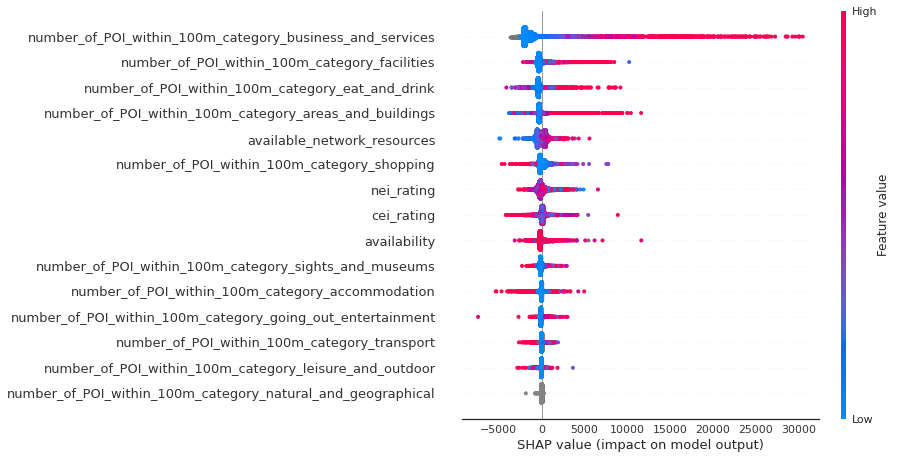

In [60]:
X           = iudf.drop(['subs_4g','kecamatan'], axis=1)
y           = iudf[['subs_4g']]
#y           = np.y['subs_4g']
model       = xgb.XGBRegressor().fit(X, y)
explainer   = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values, max_display=15)

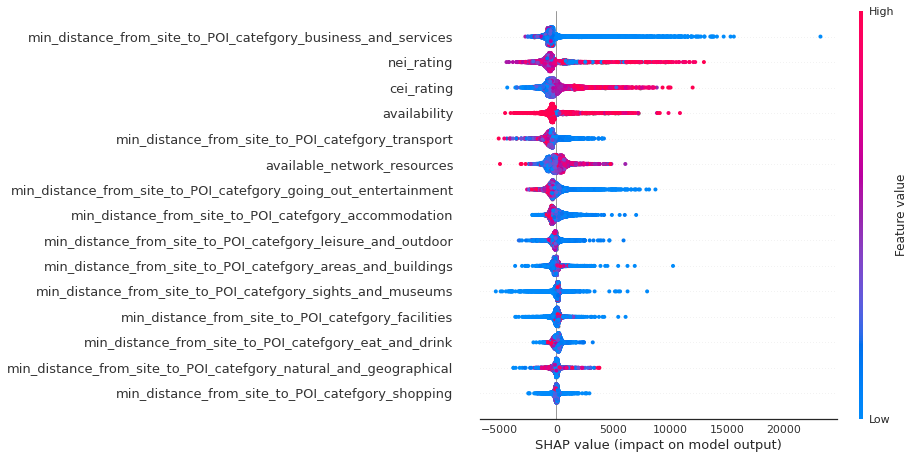

In [9]:
X           = df_100m.drop(['subs_4g','kecamatan'], axis=1)
y           = df_100m[['subs_4g']]
#y           = np.y['subs_4g']
model       = xgb.XGBRegressor().fit(X, y)
explainer   = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values, max_display=15)

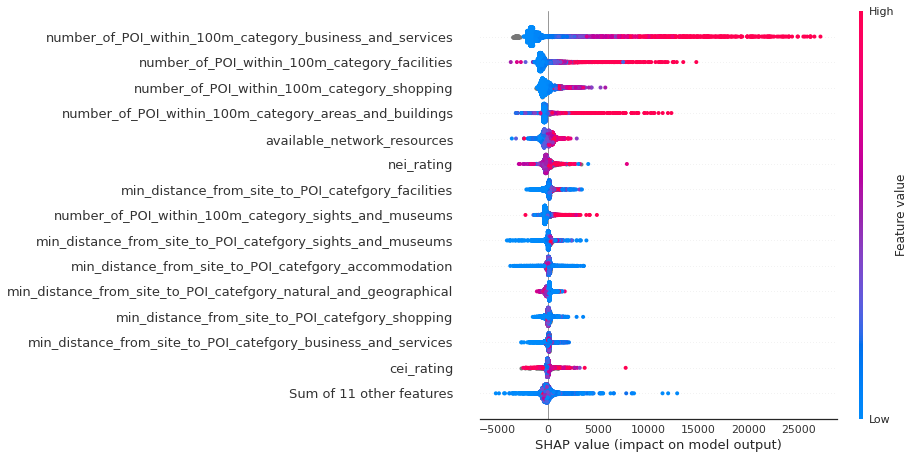

In [7]:
X           = df_param.drop(['subs_4g','kecamatan'], axis=1)
y           = df_param[['subs_4g']]
#y           = np.y['subs_4g']
model       = xgb.XGBRegressor().fit(X, y)
explainer   = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values, max_display=15)

In [ ]:
from numpy import absolute
model       = xgb.XGBRegressor().fit(X, y)
cv          = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores      = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
scores      = absolute(scores)
print('Mean r2: %.1f (%.1f)' % (scores.mean(), scores.std()))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()
model.fit(X, y)

In [ ]:
sklearn.metrics.SCORERS.keys()

In [ ]:
y.median()

In [ ]:
#Trial :

y_pred = model.predict(X)

In [ ]:
#Trial :

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

_________________________________________________

In [ ]:
model = RandomForestRegressor()
model.fit(X, y)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X, y)

# PyCaret :

In [8]:
from pycaret.regression import *

In [9]:
df_param.columns

Index(['kecamatan', 'subs_4g',
       'min_distance_from_site_to_POI_catefgory_leisure_and_outdoor',
       'min_distance_from_site_to_POI_catefgory_areas_and_buildings',
       'min_distance_from_site_to_POI_catefgory_shopping',
       'min_distance_from_site_to_POI_catefgory_going_out_entertainment',
       'min_distance_from_site_to_POI_catefgory_sights_and_museums',
       'min_distance_from_site_to_POI_catefgory_facilities',
       'min_distance_from_site_to_POI_catefgory_accommodation',
       'min_distance_from_site_to_POI_catefgory_natural_and_geographical',
       'min_distance_from_site_to_POI_catefgory_business_and_services',
       'min_distance_from_site_to_POI_catefgory_transport',
       'min_distance_from_site_to_POI_catefgory_eat_and_drink',
       'number_of_POI_within_100m_category_leisure_and_outdoor',
       'number_of_POI_within_100m_category_areas_and_buildings',
       'number_of_POI_within_100m_category_shopping',
       'number_of_POI_within_100m_category_goin

In [11]:
df_param.isnull().sum()

kecamatan                                                             0
subs_4g                                                               0
min_distance_from_site_to_POI_catefgory_leisure_and_outdoor          65
min_distance_from_site_to_POI_catefgory_areas_and_buildings          65
min_distance_from_site_to_POI_catefgory_shopping                     65
min_distance_from_site_to_POI_catefgory_going_out_entertainment      65
min_distance_from_site_to_POI_catefgory_sights_and_museums           65
min_distance_from_site_to_POI_catefgory_facilities                   65
min_distance_from_site_to_POI_catefgory_accommodation                65
min_distance_from_site_to_POI_catefgory_natural_and_geographical     65
min_distance_from_site_to_POI_catefgory_business_and_services        65
min_distance_from_site_to_POI_catefgory_transport                    65
min_distance_from_site_to_POI_catefgory_eat_and_drink                65
number_of_POI_within_100m_category_leisure_and_outdoor          

In [ ]:
iudf_5g.describe()

In [12]:
df_param = df_param.dropna(how='any')

In [13]:
df_param2 = df_param.drop('kecamatan', axis=1)

In [14]:
df_param2=df_param2.astype(int)

In [15]:
df_param2.dtypes

subs_4g                                                             int64
min_distance_from_site_to_POI_catefgory_leisure_and_outdoor         int64
min_distance_from_site_to_POI_catefgory_areas_and_buildings         int64
min_distance_from_site_to_POI_catefgory_shopping                    int64
min_distance_from_site_to_POI_catefgory_going_out_entertainment     int64
min_distance_from_site_to_POI_catefgory_sights_and_museums          int64
min_distance_from_site_to_POI_catefgory_facilities                  int64
min_distance_from_site_to_POI_catefgory_accommodation               int64
min_distance_from_site_to_POI_catefgory_natural_and_geographical    int64
min_distance_from_site_to_POI_catefgory_business_and_services       int64
min_distance_from_site_to_POI_catefgory_transport                   int64
min_distance_from_site_to_POI_catefgory_eat_and_drink               int64
number_of_POI_within_100m_category_leisure_and_outdoor              int64
number_of_POI_within_100m_category_are

In [16]:
reg = setup(data = df_param2, 
             target = 'subs_4g',
             numeric_imputation = 'mean',
             categorical_features = []  , 
             ignore_features = [],
             normalize = True,
             silent = True)

,Description,Value
0,session_id,8847
1,Target,subs_4g
2,Original Data,"(5574, 26)"
3,Missing Values,False
4,Numeric Features,22
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3901, 29)"


In [17]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1458,8.077e+06,2812,0.8355,0.6681,0.6669,1.994
lightgbm,Light Gradient Boosting Machine,1503,8.762e+06,2929,0.8187,0.6286,0.668,0.18
et,Extra Trees Regressor,1567,8.846e+06,2946,0.8181,0.6731,0.7973,0.15
gbr,Gradient Boosting Regressor,1536,9.035e+06,2978,0.8145,0.6979,0.7914,0.154
rf,Random Forest Regressor,1565,9.399e+06,3040,0.8053,0.6623,0.7728,0.213
xgboost,Extreme Gradient Boosting,1596,9.9e+06,3131,0.7928,0.728,0.7541,58.66
knn,K Neighbors Regressor,1995,1.425e+07,3733,0.7081,0.8612,1.246,0.041
br,Bayesian Ridge,2159,1.649e+07,4002,0.6627,0.9843,1.6,0.014
lasso,Lasso Regression,2161,1.66e+07,4015,0.6606,0.9804,1.595,0.326
ridge,Ridge Regression,2162,1.66e+07,4015,0.6605,0.9803,1.596,0.312


In [18]:
cb = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1548,9.707e+06,3116,0.7993,0.629,0.6753
1,1503,8.158e+06,2856,0.8185,0.6752,0.7204
2,1713,1.324e+07,3639,0.815,0.5994,0.6068
3,1375,6.91e+06,2629,0.8286,0.6286,0.6
4,1476,9.722e+06,3118,0.8189,0.6791,0.6761
5,1365,6.529e+06,2555,0.8489,0.7542,0.6655
6,1259,4.659e+06,2159,0.9013,0.6825,0.6958
7,1391,6.009e+06,2451,0.8233,0.6636,0.6542
8,1579,9.622e+06,3102,0.8385,0.6676,0.6376
9,1372,6.213e+06,2493,0.8629,0.7021,0.7377


In [143]:
#tuned_cb = tune_model(cb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1506,8.13e+06,2851,0.8095,0.721,0.84
1,1583,9.282e+06,3047,0.8163,0.7752,1.064
2,1719,1.164e+07,3412,0.7647,0.7068,0.7877
3,1431,6.336e+06,2517,0.7997,0.7032,0.8658
4,1292,5.581e+06,2362,0.7783,0.7021,0.8155
5,1598,7.852e+06,2802,0.8252,0.7206,0.851
6,1679,1.186e+07,3444,0.7702,0.7417,0.9173
7,1580,7.579e+06,2753,0.8513,0.7384,0.8996
8,1558,7.852e+06,2802,0.8546,0.7356,0.7709
9,1544,7.123e+06,2669,0.8415,0.7209,0.8689


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 4
INFO:logs:<catboost.core.CatBoostRegressor object at 0x7f1b6cee1710>
INFO:logs:tune_model() succesfully completed......................................


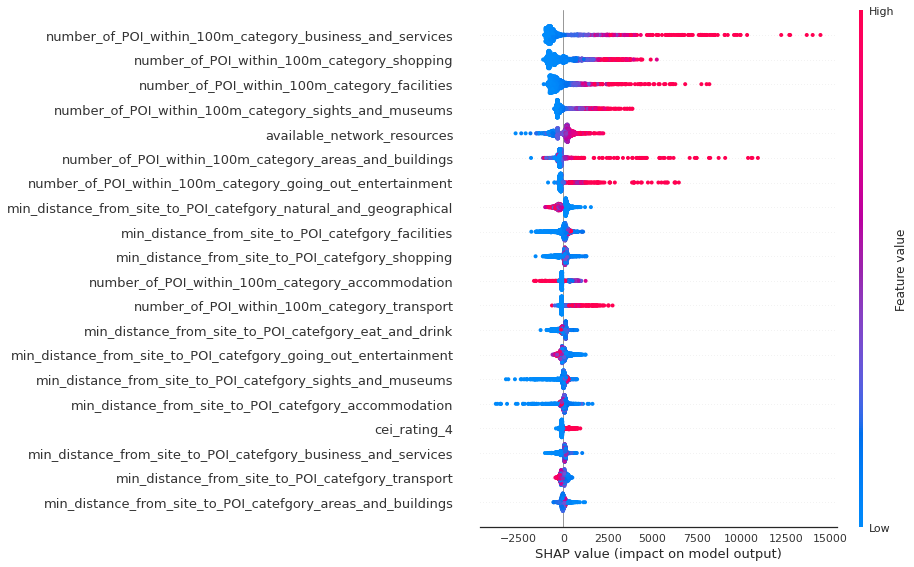

In [19]:
interpret_model(cb)

In [73]:
#df_param3 = df_param

In [74]:
#predictions = predict_model(tuned_cb, data = df_param2)
df_param3 = predictions['Label']
df_param.to_csv('IUDF_5G_2.csv',index=False)
df_param.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(display=None, ml_usecase=MLUsecase.REGRESSION, verbose=True, round=4, encoded_labels=True, probability_threshold=None, estimator=<catboost.core.CatBoostRegressor object at 0x7f1b6e93dc18>)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


0      999.940686
1    12756.302537
2     5235.522983
4     6777.664403
5      879.767188
Name: Label, dtype: float64

In [75]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
#shap.initjs()

# Write in a function
#def shap_plot(j):
    explainerModel = shap.TreeExplainer(cb)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [20]:
cb.feature_importances_.tolist()

[1.3718331025351505,
 1.4628144494382704,
 2.4282047960742354,
 1.3339907159451274,
 3.784389546227868,
 3.8984427424026653,
 5.911694525891385,
 2.4375189145464247,
 1.9670458826598731,
 1.0000664947433993,
 1.2205907907344127,
 1.5624450171360744,
 8.580796972120279,
 9.70082077213877,
 4.886325752862216,
 4.289592977782691,
 9.952533613412497,
 3.3119939892479917,
 23.360583568491037,
 2.6587077560818413,
 0.31578085787766963,
 3.436087071845047,
 0.042427306470528045,
 0.0008476698966834077,
 0.006996415204768417,
 0.0,
 0.853879825430236,
 0.0005467417611138825,
 0.22304173104173172]

In [21]:
#df_param2.info()

In [23]:
df_importance_score = pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(cb.feature_importances_)}).sort_values(by='Value', ascending=False)

In [24]:
print (get_config('X_train').columns)

Index(['min_distance_from_site_to_POI_catefgory_leisure_and_outdoor',
       'min_distance_from_site_to_POI_catefgory_areas_and_buildings',
       'min_distance_from_site_to_POI_catefgory_shopping',
       'min_distance_from_site_to_POI_catefgory_going_out_entertainment',
       'min_distance_from_site_to_POI_catefgory_sights_and_museums',
       'min_distance_from_site_to_POI_catefgory_facilities',
       'min_distance_from_site_to_POI_catefgory_accommodation',
       'min_distance_from_site_to_POI_catefgory_natural_and_geographical',
       'min_distance_from_site_to_POI_catefgory_business_and_services',
       'min_distance_from_site_to_POI_catefgory_transport',
       'min_distance_from_site_to_POI_catefgory_eat_and_drink',
       'number_of_POI_within_100m_category_leisure_and_outdoor',
       'number_of_POI_within_100m_category_areas_and_buildings',
       'number_of_POI_within_100m_category_shopping',
       'number_of_POI_within_100m_category_going_out_entertainment',
       'n

In [25]:
# Normalization 1 :

from sklearn import preprocessing

norm = df_param2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
norm_scaled = min_max_scaler.fit_transform(norm)
df_norm = pd.DataFrame(norm_scaled,columns=df_param2.columns)

In [26]:
df_norm.head()

,subs_4g,min_distance_from_site_to_POI_catefgory_leisure_and_outdoor,min_distance_from_site_to_POI_catefgory_areas_and_buildings,min_distance_from_site_to_POI_catefgory_shopping,min_distance_from_site_to_POI_catefgory_going_out_entertainment,min_distance_from_site_to_POI_catefgory_sights_and_museums,min_distance_from_site_to_POI_catefgory_facilities,min_distance_from_site_to_POI_catefgory_accommodation,min_distance_from_site_to_POI_catefgory_natural_and_geographical,min_distance_from_site_to_POI_catefgory_business_and_services,...,number_of_POI_within_100m_category_sights_and_museums,number_of_POI_within_100m_category_facilities,number_of_POI_within_100m_category_accommodation,number_of_POI_within_100m_category_natural_and_geographical,number_of_POI_within_100m_category_business_and_services,number_of_POI_within_100m_category_transport,availability,cei_rating,nei_rating,available_network_resources
0,0.001631,0.429918,0.091240,0.414530,0.737584,0.078775,0.018624,0.926943,0.000000,0.333555,...,0.000000,0.000000,0.000,0.0,0.000000,0.000000,1.00,0.333333,1.0,0.259259
1,0.177663,0.017055,0.015562,0.003189,0.012596,0.006176,0.003465,0.010256,0.000000,0.002414,...,0.250000,0.167718,0.052,0.0,0.137931,0.046512,1.00,0.666667,1.0,0.283951
2,0.085208,0.105092,0.055974,0.011192,0.128959,0.021994,0.012055,0.083917,0.224045,0.015205,...,0.005435,0.015132,0.000,0.0,0.009339,0.000000,0.99,0.666667,1.0,0.330247
3,0.089393,0.047021,0.029556,0.005064,0.043546,0.008886,0.008662,0.042169,0.188031,0.006939,...,0.038043,0.027743,0.000,0.0,0.020115,0.000000,1.00,0.666667,1.0,0.280864
4,0.031879,0.145628,0.017257,0.027698,0.127099,0.013423,0.014076,0.116675,0.000000,0.012732,...,0.000000,0.002522,0.000,0.0,0.000000,0.015504,1.00,0.666667,1.0,0.342593


In [27]:
df_importance_score.loc[df_importance_score['Feature']=='number_of_POI_within_100m_category_facilities',['Value']].values[0][0]

9.952533613412497

In [28]:
# Scoring - Site Data also need to be normalized :
df_input.columns

Index(['site_id', 'site_name', 'long', 'lat', 'class', 'kecamatan',
       'kabupaten', 'region', 'subs_4g',
       'min_distance_from_site_to_POI_catefgory_leisure_and_outdoor',
       'min_distance_from_site_to_POI_catefgory_areas_and_buildings',
       'min_distance_from_site_to_POI_catefgory_shopping',
       'min_distance_from_site_to_POI_catefgory_going_out_entertainment',
       'min_distance_from_site_to_POI_catefgory_sights_and_museums',
       'min_distance_from_site_to_POI_catefgory_facilities',
       'min_distance_from_site_to_POI_catefgory_accommodation',
       'min_distance_from_site_to_POI_catefgory_natural_and_geographical',
       'min_distance_from_site_to_POI_catefgory_business_and_services',
       'min_distance_from_site_to_POI_catefgory_transport',
       'min_distance_from_site_to_POI_catefgory_eat_and_drink',
       'number_of_POI_within_100m_category_leisure_and_outdoor',
       'number_of_POI_within_100m_category_areas_and_buildings',
       'number_of_POI_w

In [29]:
df_importance_score

,Feature,Value
18,number_of_POI_within_100m_category_business_an...,23.360584
16,number_of_POI_within_100m_category_facilities,9.952534
13,number_of_POI_within_100m_category_shopping,9.700821
12,number_of_POI_within_100m_category_areas_and_b...,8.580797
6,min_distance_from_site_to_POI_catefgory_accomm...,5.911695
14,number_of_POI_within_100m_category_going_out_e...,4.886326
15,number_of_POI_within_100m_category_sights_and_...,4.289593
5,min_distance_from_site_to_POI_catefgory_facili...,3.898443
4,min_distance_from_site_to_POI_catefgory_sights...,3.784390
21,available_network_resources,3.436087


In [30]:
col_input = ['min_distance_from_site_to_POI_catefgory_leisure_and_outdoor',
       'min_distance_from_site_to_POI_catefgory_areas_and_buildings',
       'min_distance_from_site_to_POI_catefgory_shopping',
       'min_distance_from_site_to_POI_catefgory_going_out_entertainment',
       'min_distance_from_site_to_POI_catefgory_sights_and_museums',
       'min_distance_from_site_to_POI_catefgory_facilities',
       'min_distance_from_site_to_POI_catefgory_accommodation',
       'min_distance_from_site_to_POI_catefgory_natural_and_geographical',
       'min_distance_from_site_to_POI_catefgory_business_and_services',
       'min_distance_from_site_to_POI_catefgory_transport',
       'min_distance_from_site_to_POI_catefgory_eat_and_drink',
       'number_of_POI_within_100m_category_leisure_and_outdoor',
       'number_of_POI_within_100m_category_areas_and_buildings',
       'number_of_POI_within_100m_category_shopping',
       'number_of_POI_within_100m_category_going_out_entertainment',
       'number_of_POI_within_100m_category_sights_and_museums',
       'number_of_POI_within_100m_category_facilities',
       'number_of_POI_within_100m_category_accommodation',
       'number_of_POI_within_100m_category_business_and_services',
       'number_of_POI_within_100m_category_transport', 'availability',
       'available_network_resources']

for i in col_input:
    norm=df_input[[i]].values
    min_max_scaler = preprocessing.MinMaxScaler()
    norm_scaled = min_max_scaler.fit_transform(norm)
    df_final_input = pd.DataFrame(norm_scaled,columns=[i])
    df_input[[i]]=df_final_input[i]

In [31]:
df_input.describe()

,long,lat,min_distance_from_site_to_POI_catefgory_leisure_and_outdoor,min_distance_from_site_to_POI_catefgory_areas_and_buildings,min_distance_from_site_to_POI_catefgory_shopping,min_distance_from_site_to_POI_catefgory_going_out_entertainment,min_distance_from_site_to_POI_catefgory_sights_and_museums,min_distance_from_site_to_POI_catefgory_facilities,min_distance_from_site_to_POI_catefgory_accommodation,min_distance_from_site_to_POI_catefgory_natural_and_geographical,...,number_of_POI_within_100m_category_areas_and_buildings,number_of_POI_within_100m_category_shopping,number_of_POI_within_100m_category_going_out_entertainment,number_of_POI_within_100m_category_sights_and_museums,number_of_POI_within_100m_category_facilities,number_of_POI_within_100m_category_accommodation,number_of_POI_within_100m_category_business_and_services,number_of_POI_within_100m_category_transport,availability,available_network_resources
count,58423.000000,58423.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,...,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,57957.000000,58401.000000
mean,110.282862,-3.948237,0.092846,0.047329,0.035048,0.095490,0.032082,0.020042,0.085024,0.193408,...,0.013659,0.008390,0.004084,0.016605,0.011855,0.007352,0.015385,0.008857,0.995796,0.054543
std,8.378089,3.882754,0.139288,0.075479,0.092497,0.150995,0.080854,0.058758,0.139828,0.216804,...,0.050540,0.023193,0.017892,0.033887,0.025162,0.026689,0.032553,0.034500,0.038590,0.031744
min,95.079310,-10.930090,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,105.133586,-7.017145,0.014691,0.011619,0.002122,0.009263,0.004942,0.002989,0.007752,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.028682
50%,108.364300,-5.445080,0.035697,0.022847,0.005068,0.027276,0.009648,0.006018,0.021575,0.123195,...,0.000000,0.001590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.043938
75%,115.138616,-0.873028,0.102969,0.050283,0.016134,0.108399,0.020558,0.013393,0.093781,0.350063,...,0.000000,0.007949,0.000000,0.035714,0.013423,0.000000,0.016043,0.000000,1.000000,0.074451
max,141.006740,5.905323,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
for i in col_input:
    print (i)
    df_input[[i]]=df_input[[i]]*df_importance_score.loc[df_importance_score['Feature']==i,['Value']].values[0][0]

min_distance_from_site_to_POI_catefgory_leisure_and_outdoor
min_distance_from_site_to_POI_catefgory_areas_and_buildings
min_distance_from_site_to_POI_catefgory_shopping
min_distance_from_site_to_POI_catefgory_going_out_entertainment
min_distance_from_site_to_POI_catefgory_sights_and_museums
min_distance_from_site_to_POI_catefgory_facilities
min_distance_from_site_to_POI_catefgory_accommodation
min_distance_from_site_to_POI_catefgory_natural_and_geographical
min_distance_from_site_to_POI_catefgory_business_and_services
min_distance_from_site_to_POI_catefgory_transport
min_distance_from_site_to_POI_catefgory_eat_and_drink
number_of_POI_within_100m_category_leisure_and_outdoor
number_of_POI_within_100m_category_areas_and_buildings
number_of_POI_within_100m_category_shopping
number_of_POI_within_100m_category_going_out_entertainment
number_of_POI_within_100m_category_sights_and_museums
number_of_POI_within_100m_category_facilities
number_of_POI_within_100m_category_accommodation
number_of_

In [33]:
 df_input.columns

Index(['site_id', 'site_name', 'long', 'lat', 'class', 'kecamatan',
       'kabupaten', 'region', 'subs_4g',
       'min_distance_from_site_to_POI_catefgory_leisure_and_outdoor',
       'min_distance_from_site_to_POI_catefgory_areas_and_buildings',
       'min_distance_from_site_to_POI_catefgory_shopping',
       'min_distance_from_site_to_POI_catefgory_going_out_entertainment',
       'min_distance_from_site_to_POI_catefgory_sights_and_museums',
       'min_distance_from_site_to_POI_catefgory_facilities',
       'min_distance_from_site_to_POI_catefgory_accommodation',
       'min_distance_from_site_to_POI_catefgory_natural_and_geographical',
       'min_distance_from_site_to_POI_catefgory_business_and_services',
       'min_distance_from_site_to_POI_catefgory_transport',
       'min_distance_from_site_to_POI_catefgory_eat_and_drink',
       'number_of_POI_within_100m_category_leisure_and_outdoor',
       'number_of_POI_within_100m_category_areas_and_buildings',
       'number_of_POI_w

In [35]:
total_weighting = ['min_distance_from_site_to_POI_catefgory_leisure_and_outdoor',
       'min_distance_from_site_to_POI_catefgory_areas_and_buildings',
       'min_distance_from_site_to_POI_catefgory_shopping',
       'min_distance_from_site_to_POI_catefgory_going_out_entertainment',
       'min_distance_from_site_to_POI_catefgory_sights_and_museums',
       'min_distance_from_site_to_POI_catefgory_facilities',
       'min_distance_from_site_to_POI_catefgory_accommodation',
       'min_distance_from_site_to_POI_catefgory_natural_and_geographical',
       'min_distance_from_site_to_POI_catefgory_business_and_services',
       'min_distance_from_site_to_POI_catefgory_transport',
       'min_distance_from_site_to_POI_catefgory_eat_and_drink',
       'number_of_POI_within_100m_category_leisure_and_outdoor',
       'number_of_POI_within_100m_category_areas_and_buildings',
       'number_of_POI_within_100m_category_shopping',
       'number_of_POI_within_100m_category_going_out_entertainment',
       'number_of_POI_within_100m_category_sights_and_museums',
       'number_of_POI_within_100m_category_facilities',
       'number_of_POI_within_100m_category_accommodation',
       'number_of_POI_within_100m_category_business_and_services',
       'number_of_POI_within_100m_category_transport', 'availability',
       'available_network_resources']

df_input['Total'] = df_input[total_weighting].sum(axis = 1)

In [36]:
df_input.head()

,site_id,site_name,long,lat,class,kecamatan,kabupaten,region,subs_4g,min_distance_from_site_to_POI_catefgory_leisure_and_outdoor,...,number_of_POI_within_100m_category_shopping,number_of_POI_within_100m_category_going_out_entertainment,number_of_POI_within_100m_category_sights_and_museums,number_of_POI_within_100m_category_facilities,number_of_POI_within_100m_category_accommodation,number_of_POI_within_100m_category_business_and_services,number_of_POI_within_100m_category_transport,availability,available_network_resources,Total
0,DPR033,DPR033M41_HotelintanSari,115.209720,-8.658200,Silver,DENPASAR BARAT,KOTA DENPASAR,BALI NUSRA,176.0,0.003067,...,0.493523,0.139609,0.306399,0.667955,0.114207,1.374152,0.166169,0.315781,0.255819,4.476919
1,BIM187,BIM187M41_DoroLuwu,118.516720,-8.478212,Silver,MADA PANGGA,BIMA,BALI NUSRA,264.0,0.051023,...,0.015423,0.000000,0.306399,0.000000,0.000000,0.000000,0.000000,0.315781,0.150975,4.015783
2,SMD390,SMD390M41_DSNKIRISIKPAJAGANIGIHON-GHN,108.169472,-6.967944,Bronze,JATINUNGGAL,SUMEDANG,WEST JAVA,80.0,0.228279,...,0.215917,0.000000,0.000000,0.267182,0.000000,0.624615,0.000000,0.315781,0.046131,4.184807
3,SUB518,SUB518M41_DUSUNTENGAH-TBG,107.825800,-6.277200,Gold,PAMANUKAN,SUBANG,WEST JAVA,614.0,0.044734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.315781,0.150975,1.189644
4,BIR300,BIR300MM2-MATANG-REULEUT,96.598663,5.203829,Bronze,PEUDADA,BIREUEN,SUMBAGUT,107.0,0.324294,...,0.000000,0.000000,0.153200,0.000000,0.000000,0.000000,0.000000,0.315781,0.046131,1.885573


In [37]:
df_input.to_csv('POI_Site_Analytics_result1.csv')

In [39]:
df_input.describe()

,long,lat,min_distance_from_site_to_POI_catefgory_leisure_and_outdoor,min_distance_from_site_to_POI_catefgory_areas_and_buildings,min_distance_from_site_to_POI_catefgory_shopping,min_distance_from_site_to_POI_catefgory_going_out_entertainment,min_distance_from_site_to_POI_catefgory_sights_and_museums,min_distance_from_site_to_POI_catefgory_facilities,min_distance_from_site_to_POI_catefgory_accommodation,min_distance_from_site_to_POI_catefgory_natural_and_geographical,...,number_of_POI_within_100m_category_shopping,number_of_POI_within_100m_category_going_out_entertainment,number_of_POI_within_100m_category_sights_and_museums,number_of_POI_within_100m_category_facilities,number_of_POI_within_100m_category_accommodation,number_of_POI_within_100m_category_business_and_services,number_of_POI_within_100m_category_transport,availability,available_network_resources,Total
count,58423.000000,58423.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,...,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,57957.000000,58401.000000,58423.000000
mean,110.282862,-3.948237,0.127369,0.069233,0.085104,0.127383,0.121411,0.078133,0.502639,0.471437,...,0.081387,0.019957,0.071227,0.117991,0.024348,0.359394,0.023548,0.314453,0.187413,3.120548
std,8.378089,3.882754,0.191079,0.110412,0.224603,0.201426,0.305982,0.229063,0.826620,0.528464,...,0.224989,0.087427,0.145363,0.250423,0.088393,0.760446,0.091725,0.012186,0.109077,1.870392
min,95.079310,-10.930090,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046131
25%,105.133586,-7.017145,0.020153,0.016997,0.005152,0.012356,0.018704,0.011652,0.045826,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.315781,0.098553,1.851933
50%,108.364300,-5.445080,0.048971,0.033421,0.012306,0.036386,0.036511,0.023460,0.127546,0.300290,...,0.015423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.315781,0.150975,2.664475
75%,115.138616,-0.873028,0.141257,0.073554,0.039176,0.144604,0.077801,0.052212,0.554402,0.853285,...,0.077113,0.000000,0.153200,0.133591,0.000000,0.374769,0.000000,0.315781,0.255819,3.860858
max,141.006740,5.905323,1.371833,1.462814,2.428205,1.333991,3.784390,3.898443,5.911695,2.437519,...,9.700821,4.886326,4.289593,9.952534,3.311994,23.360584,2.658708,0.315781,3.436087,25.094197


In [2]:
cek = pd.read_csv('POI_Site_Analytics_result1.csv')
cek.head()

,Unnamed: 0,site_id,site_name,long,lat,class,kecamatan,kabupaten,region,subs_4g,...,number_of_POI_within_100m_category_shopping,number_of_POI_within_100m_category_going_out_entertainment,number_of_POI_within_100m_category_sights_and_museums,number_of_POI_within_100m_category_facilities,number_of_POI_within_100m_category_accommodation,number_of_POI_within_100m_category_business_and_services,number_of_POI_within_100m_category_transport,availability,available_network_resources,Total
0,0,DPR033,DPR033M41_HotelintanSari,115.209720,-8.658200,Silver,DENPASAR BARAT,KOTA DENPASAR,BALI NUSRA,176.0,...,0.493523,0.139609,0.306399,0.667955,0.114207,1.374152,0.166169,0.315781,0.255819,4.476919
1,1,BIM187,BIM187M41_DoroLuwu,118.516720,-8.478212,Silver,MADA PANGGA,BIMA,BALI NUSRA,264.0,...,0.015423,0.000000,0.306399,0.000000,0.000000,0.000000,0.000000,0.315781,0.150975,4.015783
2,2,SMD390,SMD390M41_DSNKIRISIKPAJAGANIGIHON-GHN,108.169472,-6.967944,Bronze,JATINUNGGAL,SUMEDANG,WEST JAVA,80.0,...,0.215917,0.000000,0.000000,0.267182,0.000000,0.624615,0.000000,0.315781,0.046131,4.184807
3,3,SUB518,SUB518M41_DUSUNTENGAH-TBG,107.825800,-6.277200,Gold,PAMANUKAN,SUBANG,WEST JAVA,614.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.315781,0.150975,1.189644
4,4,BIR300,BIR300MM2-MATANG-REULEUT,96.598663,5.203829,Bronze,PEUDADA,BIREUEN,SUMBAGUT,107.0,...,0.000000,0.000000,0.153200,0.000000,0.000000,0.000000,0.000000,0.315781,0.046131,1.885573


In [3]:
cek['quantile'] = pd.qcut(cek['Total'], 7, labels=False)

In [4]:
cek.head()

,Unnamed: 0,site_id,site_name,long,lat,class,kecamatan,kabupaten,region,subs_4g,...,number_of_POI_within_100m_category_going_out_entertainment,number_of_POI_within_100m_category_sights_and_museums,number_of_POI_within_100m_category_facilities,number_of_POI_within_100m_category_accommodation,number_of_POI_within_100m_category_business_and_services,number_of_POI_within_100m_category_transport,availability,available_network_resources,Total,quantile
0,0,DPR033,DPR033M41_HotelintanSari,115.209720,-8.658200,Silver,DENPASAR BARAT,KOTA DENPASAR,BALI NUSRA,176.0,...,0.139609,0.306399,0.667955,0.114207,1.374152,0.166169,0.315781,0.255819,4.476919,5
1,1,BIM187,BIM187M41_DoroLuwu,118.516720,-8.478212,Silver,MADA PANGGA,BIMA,BALI NUSRA,264.0,...,0.000000,0.306399,0.000000,0.000000,0.000000,0.000000,0.315781,0.150975,4.015783,5
2,2,SMD390,SMD390M41_DSNKIRISIKPAJAGANIGIHON-GHN,108.169472,-6.967944,Bronze,JATINUNGGAL,SUMEDANG,WEST JAVA,80.0,...,0.000000,0.000000,0.267182,0.000000,0.624615,0.000000,0.315781,0.046131,4.184807,5
3,3,SUB518,SUB518M41_DUSUNTENGAH-TBG,107.825800,-6.277200,Gold,PAMANUKAN,SUBANG,WEST JAVA,614.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.315781,0.150975,1.189644,0
4,4,BIR300,BIR300MM2-MATANG-REULEUT,96.598663,5.203829,Bronze,PEUDADA,BIREUEN,SUMBAGUT,107.0,...,0.000000,0.153200,0.000000,0.000000,0.000000,0.000000,0.315781,0.046131,1.885573,1


In [5]:
cek.to_csv('POI_Site_Analytics_result2.csv')

In [7]:
cek.describe()

,Unnamed: 0,long,lat,subs_4g,min_distance_from_site_to_POI_catefgory_leisure_and_outdoor,min_distance_from_site_to_POI_catefgory_areas_and_buildings,min_distance_from_site_to_POI_catefgory_shopping,min_distance_from_site_to_POI_catefgory_going_out_entertainment,min_distance_from_site_to_POI_catefgory_sights_and_museums,min_distance_from_site_to_POI_catefgory_facilities,...,number_of_POI_within_100m_category_going_out_entertainment,number_of_POI_within_100m_category_sights_and_museums,number_of_POI_within_100m_category_facilities,number_of_POI_within_100m_category_accommodation,number_of_POI_within_100m_category_business_and_services,number_of_POI_within_100m_category_transport,availability,available_network_resources,Total,quantile
count,58423.000000,58423.000000,58423.000000,57968.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,...,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,57957.000000,58401.000000,58423.000000,58423.000000
mean,29211.000000,110.282862,-3.948237,454.632004,0.127369,0.069233,0.085104,0.127383,0.121411,0.078133,...,0.019957,0.071227,0.117991,0.024348,0.359394,0.023548,0.314453,0.187413,3.120548,2.999966
std,16865.411725,8.378089,3.882754,533.397807,0.191079,0.110412,0.224603,0.201426,0.305982,0.229063,...,0.087427,0.145363,0.250423,0.088393,0.760446,0.091725,0.012186,0.109077,1.870392,2.000051
min,0.000000,95.079310,-10.930090,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046131,0.000000
25%,14605.500000,105.133586,-7.017145,163.000000,0.020153,0.016997,0.005152,0.012356,0.018704,0.011652,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.315781,0.098553,1.851933,1.000000
50%,29211.000000,108.364300,-5.445080,323.000000,0.048971,0.033421,0.012306,0.036386,0.036511,0.023460,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.315781,0.150975,2.664475,3.000000
75%,43816.500000,115.138616,-0.873028,615.000000,0.141257,0.073554,0.039176,0.144604,0.077801,0.052212,...,0.000000,0.153200,0.133591,0.000000,0.374769,0.000000,0.315781,0.255819,3.860858,5.000000
max,58422.000000,141.006740,5.905323,41201.000000,1.371833,1.462814,2.428205,1.333991,3.784390,3.898443,...,4.886326,4.289593,9.952534,3.311994,23.360584,2.658708,0.315781,3.436087,25.094197,6.000000


In [8]:
cek = cek.sort_values(by=['Total'], ascending=False)

In [12]:
cek['Rank']= pd.qcut(cek['Total'], 
                           q = 7, labels = False)

In [13]:
cek.describe()

,Unnamed: 0,long,lat,subs_4g,min_distance_from_site_to_POI_catefgory_leisure_and_outdoor,min_distance_from_site_to_POI_catefgory_areas_and_buildings,min_distance_from_site_to_POI_catefgory_shopping,min_distance_from_site_to_POI_catefgory_going_out_entertainment,min_distance_from_site_to_POI_catefgory_sights_and_museums,min_distance_from_site_to_POI_catefgory_facilities,...,number_of_POI_within_100m_category_sights_and_museums,number_of_POI_within_100m_category_facilities,number_of_POI_within_100m_category_accommodation,number_of_POI_within_100m_category_business_and_services,number_of_POI_within_100m_category_transport,availability,available_network_resources,Total,quantile,Rank
count,58423.000000,58423.000000,58423.000000,57968.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,...,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,57957.000000,58401.000000,58423.000000,58423.000000,58423.000000
mean,29211.000000,110.282862,-3.948237,454.632004,0.127369,0.069233,0.085104,0.127383,0.121411,0.078133,...,0.071227,0.117991,0.024348,0.359394,0.023548,0.314453,0.187413,3.120548,2.999966,2.999966
std,16865.411725,8.378089,3.882754,533.397807,0.191079,0.110412,0.224603,0.201426,0.305982,0.229063,...,0.145363,0.250423,0.088393,0.760446,0.091725,0.012186,0.109077,1.870392,2.000051,2.000051
min,0.000000,95.079310,-10.930090,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046131,0.000000,0.000000
25%,14605.500000,105.133586,-7.017145,163.000000,0.020153,0.016997,0.005152,0.012356,0.018704,0.011652,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.315781,0.098553,1.851933,1.000000,1.000000
50%,29211.000000,108.364300,-5.445080,323.000000,0.048971,0.033421,0.012306,0.036386,0.036511,0.023460,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.315781,0.150975,2.664475,3.000000,3.000000
75%,43816.500000,115.138616,-0.873028,615.000000,0.141257,0.073554,0.039176,0.144604,0.077801,0.052212,...,0.153200,0.133591,0.000000,0.374769,0.000000,0.315781,0.255819,3.860858,5.000000,5.000000
max,58422.000000,141.006740,5.905323,41201.000000,1.371833,1.462814,2.428205,1.333991,3.784390,3.898443,...,4.289593,9.952534,3.311994,23.360584,2.658708,0.315781,3.436087,25.094197,6.000000,6.000000


In [14]:
print(cek['Rank'].value_counts())

5    8347
0    8347
6    8346
3    8346
2    8346
1    8346
4    8345
Name: Rank, dtype: int64
